In [5]:
import numpy as np
import pandas as pd
from sklearn import *

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\Public\An

In [6]:
sklearn

<module 'sklearn' from 'C:\\Users\\Public\\Anaconda3\\lib\\site-packages\\sklearn\\__init__.py'>

In [7]:
%doctest_mode

Exception reporting mode: Context
Doctest mode is: OFF


In [8]:
>>> from sklearn.feature_selection import VarianceThreshold
>>> X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
>>> sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
>>> sel.fit_transform(X)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest
iris=load_iris()

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [15]:
X,y=iris.data, iris.target

In [16]:
X.shape

(150, 4)

In [17]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [23]:
X_new.shape

(150, 2)

### Feature Selection using different test:
1. Continous-continous: Correlation
2. Continous-Categorical: LDA
3. Categorical- Categorial:ANOVA
4. Categorical-Categorical: Chi-Square

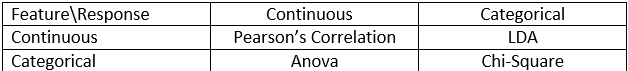

In [26]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import tree
dataset=pd.read_csv('car_datacat.csv')
x = dataset.iloc[:,0:6].values
y =dataset.iloc[:,6].values
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=7, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)
y_pred = clf_gini.predict(x_test)
print(confusion_matrix(y_test, y_pred))
target_names=['acc','good','unacc','v-good']
print(classification_report(y_test, y_pred, target_names=target_names))
data_feature_names=dataset.columns.values.tolist()
data_feature_names=data_feature_names[:-1]
print(data_feature_names)
with open("clf_gini.txt", "w") as f:
    f = tree.export_graphviz(clf_gini, feature_names=data_feature_names, filled=True,
                               rounded=True, out_file=f)

[[ 92   2   0   1]
 [ 11   3   0   3]
 [  9   1 293   0]
 [  6   0   0  11]]
             precision    recall  f1-score   support

        acc       0.78      0.97      0.86        95
       good       0.50      0.18      0.26        17
      unacc       1.00      0.97      0.98       303
     v-good       0.73      0.65      0.69        17

avg / total       0.92      0.92      0.92       432

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
